In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### EXPLORING DATA

In [2]:
data=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
column_names = data.columns.tolist()
print(column_names)

['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


In [4]:
num_rows, num_cols = data.shape
print(num_rows, num_cols)

186879 17


In [5]:
first_three_rows = data.head(3)
print(first_three_rows)

   VIN (1-10)  County       City State  Postal Code  Model Year   Make  \
0  WBY8P6C58K    King    Seattle    WA      98115.0        2019    BMW   
1  5YJSA1DN4D  Kitsap  Bremerton    WA      98312.0        2013  TESLA   
2  5YJSA1E26J    King       Kent    WA      98042.0        2018  TESLA   

     Model           Electric Vehicle Type  \
0       I3  Battery Electric Vehicle (BEV)   
1  MODEL S  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             153   
1           Clean Alternative Fuel Vehicle Eligible             208   
2           Clean Alternative Fuel Vehicle Eligible             249   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  43.0       259254397   
1      69900                  35.0       127420940   
2          0                  47.0       170287183   

                

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186879 entries, 0 to 186878
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         186879 non-null  object 
 1   County                                             186876 non-null  object 
 2   City                                               186876 non-null  object 
 3   State                                              186879 non-null  object 
 4   Postal Code                                        186876 non-null  float64
 5   Model Year                                         186879 non-null  int64  
 6   Make                                               186879 non-null  object 
 7   Model                                              186879 non-null  object 
 8   Electric Vehicle Type                              186879 non-null  object

###### SEGMENT EXTRACTION

In [7]:
ilocfunc = data.iloc[:,0:9]
ilocfunc

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV)
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV)
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV)
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV)
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV)
...,...,...,...,...,...,...,...,...,...
186874,JTMEB3FVXM,Snohomish,Arlington,WA,98223.0,2021,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV)
186875,7SAYGAEEXP,Snohomish,Stanwood,WA,98292.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
186876,3FA6P0SUXK,King,Auburn,WA,98001.0,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
186877,7SAYGDEE1P,Pierce,Tacoma,WA,98422.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV)


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df = pd.DataFrame(data)

In [18]:
df_encoded = pd.get_dummies(df, columns=['City', 'County', 'Make', 'Electric Vehicle Type', 'Vehicle Location'], drop_first=True)

In [19]:
scaler = StandardScaler()
numerical_features = ['Electric Range', 'Base MSRP', 'Model Year']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [8]:
df = pd.DataFrame(data)
def segment_market(row):
    if row['City'] in ['Seattle', 'San Francisco', 'New York'] and row['Make'] == 'Tesla' and row['Electric Range'] > 300:
        return 'Urban Tech Enthusiasts'
    if row['County'] in ['King', 'Snohomish'] and row['Make'] in ['Nissan', 'Chevrolet', 'Ford', 'BMW'] and row['Electric Vehicle Type'] == 'BEV':
        return 'Eco-Friendly Suburban Families'
    if row['Vehicle Location'] == 'Garage' and row['Model Year'] < 2020 and row['Base MSRP'] < 40000:
        return 'Rural Budget Buyers'
    if row['Vehicle Location'] == 'Office' and row['City'] in ['Seattle', 'Bellevue', 'Everett'] and row['Base MSRP'] < 40000:
        return 'Urban Budget Buyers'
    if row['Make'] in ['Tesla', 'BMW'] and row['Base MSRP'] > 70000:
        return 'Premium Electric Enthusiasts'
    return 'Other'
df['Segment'] = df.apply(segment_market, axis=1)
print(df)

        VIN (1-10)     County            City State  Postal Code  Model Year  \
0       WBY8P6C58K       King         Seattle    WA      98115.0        2019   
1       5YJSA1DN4D     Kitsap       Bremerton    WA      98312.0        2013   
2       5YJSA1E26J       King            Kent    WA      98042.0        2018   
3       WBY2Z2C54E       King        Bellevue    WA      98004.0        2014   
4       5YJXCDE23J       King        Bellevue    WA      98004.0        2018   
...            ...        ...             ...   ...          ...         ...   
186874  JTMEB3FVXM  Snohomish       Arlington    WA      98223.0        2021   
186875  7SAYGAEEXP  Snohomish        Stanwood    WA      98292.0        2023   
186876  3FA6P0SUXK       King          Auburn    WA      98001.0        2019   
186877  7SAYGDEE1P     Pierce          Tacoma    WA      98422.0        2023   
186878  7SAYGDEE1R    Douglas  East Wenatchee    WA      98802.0        2024   

          Make       Model             

###### PROFILING AND DESCRIBING POTENTIAL SEGMENTS

In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
non_numeric_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
df_encoded.fillna(df_encoded.mean(), inplace=True) 
print(df_encoded.dtypes)
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

df['Segment'] = kmeans.fit_predict(df_encoded)
print(df.head())

VIN (1-10)                                             int32
County                                                 int32
City                                                   int32
State                                                  int32
Postal Code                                          float64
Model Year                                             int64
Make                                                   int32
Model                                                  int32
Electric Vehicle Type                                  int32
Clean Alternative Fuel Vehicle (CAFV) Eligibility      int32
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                       int32
Electric Utility                                       int32
2020 Census Tract       

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0        9281      83   581     42      98115.0        2019     4     66   
1        3574      85    59     42      98312.0        2013    34     82   
2        3687      83   299     42      98042.0        2018    34     82   
3        8989      83    44     42      98004.0        2014     4     70   
4        4268      83    44     42      98004.0        2018    34     83   

   Electric Vehicle Type  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                      0                                                  0   
1                      0                                                  0   
2                      0                                                  0   
3                      1                                                  2   
4                      0                                                  0   

   Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  

###### SELECTION OF TARGET SEGMENT

In [38]:
target_segment = 0
target_segment_df = df[df['Segment'] == target_segment]

In [39]:
target_segment_profile = target_segment_df.describe()
print(target_segment_profile)

          VIN (1-10)         County           City          State  \
count  186570.000000  186570.000000  186570.000000  186570.000000   
mean     4239.994935     102.255132     404.761714      41.998510   
std      2499.428364      43.092511     219.841765       0.162549   
min         0.000000       1.000000       0.000000       0.000000   
25%      2672.000000      83.000000     203.000000      42.000000   
50%      4233.500000      83.000000     481.000000      42.000000   
75%      5004.000000     129.000000     581.000000      42.000000   
max     11241.000000     197.000000     736.000000      44.000000   

         Postal Code     Model Year           Make          Model  \
count  186567.000000  186570.000000  186570.000000  186570.000000   
mean    98235.410823    2020.660658      25.492737      79.930241   
std      1364.237177       2.991498      11.573625      28.215673   
min     20105.000000    1997.000000       0.000000       0.000000   
25%     98052.000000    2019.0000

###### CALCULATING POTENTIAL PROFIT

In [40]:
potential_customer_base = len(target_segment_df)
average_target_price = (30000 + 40000) / 2
potential_profit = potential_customer_base * average_target_price
print(f'Potential Profit: ${potential_profit}')

Potential Profit: $6529950000.0


###### IDENTIFYING THE MOST OPTIMAL MARKET SEGMENTS

In [41]:
segment_counts = df['Segment'].value_counts()
print(segment_counts)

Segment
0    186570
3       166
1        77
2        66
Name: count, dtype: int64


In [42]:
optimal_segments = segment_counts[segment_counts > 100].index.tolist()  # Adjust the threshold as needed
print(f'Most Optimal Segments: {optimal_segments}')

Most Optimal Segments: [0, 3]


###### VISUALISATION

In [9]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


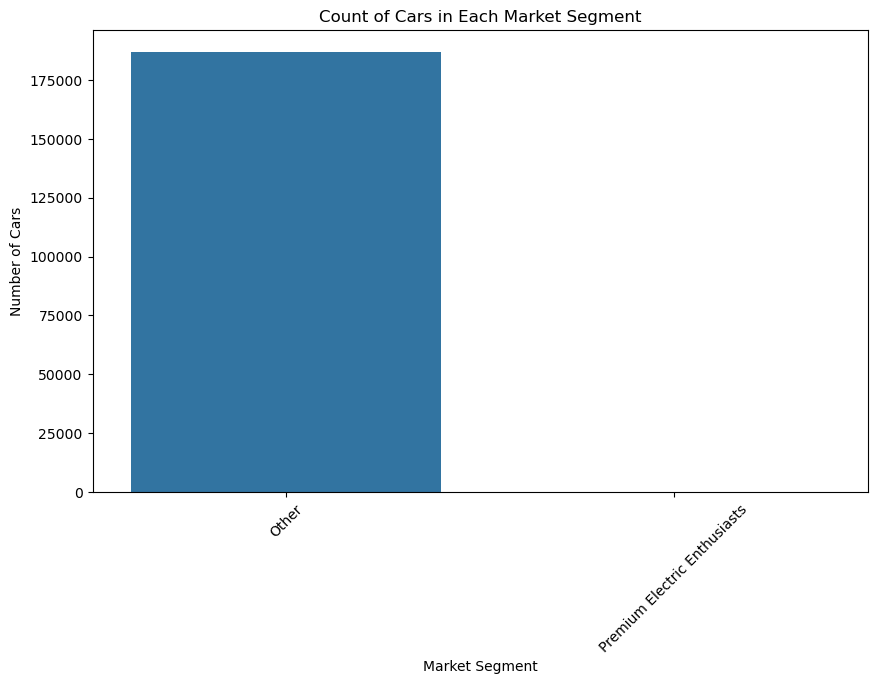

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment', order=df['Segment'].value_counts().index)
plt.title('Count of Cars in Each Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

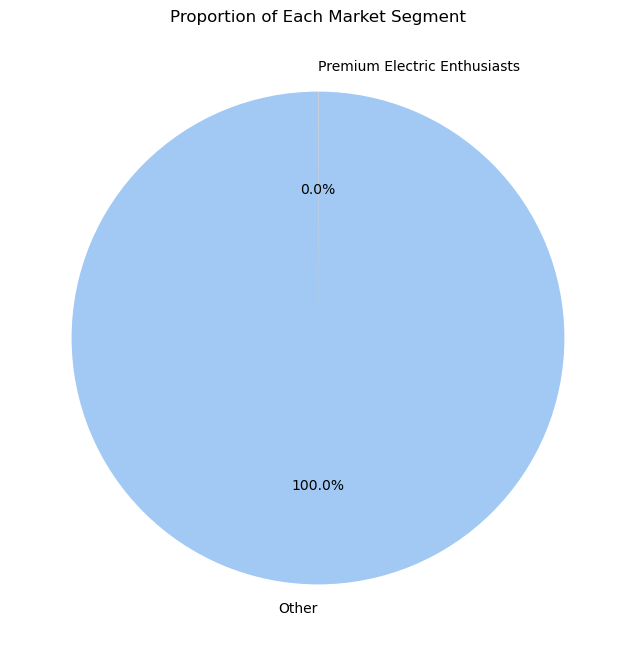

In [11]:
plt.figure(figsize=(8, 8))
df['Segment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Each Market Segment')
plt.ylabel('')
plt.show()

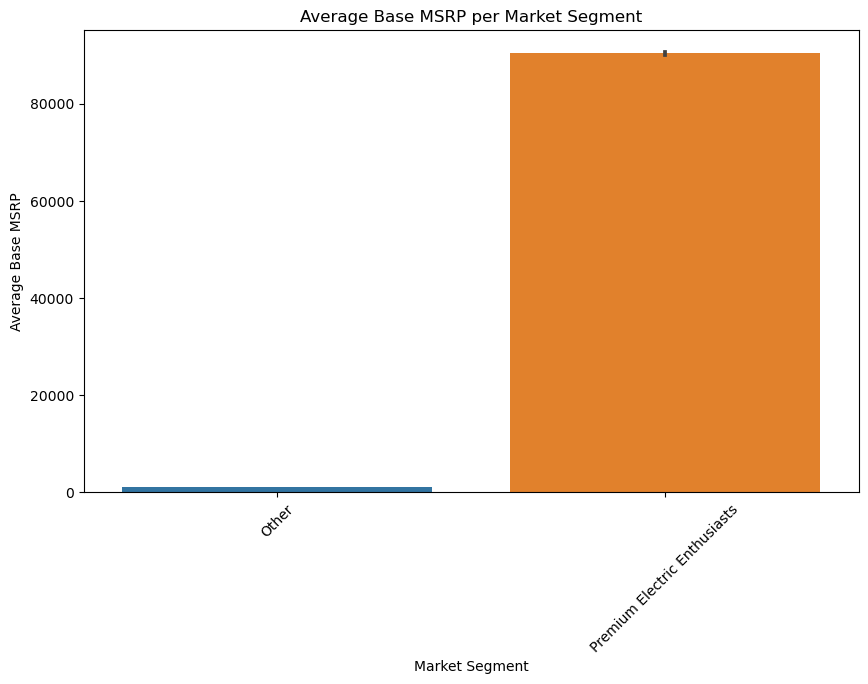

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Segment', y='Base MSRP', estimator=np.mean, order=df['Segment'].value_counts().index)
plt.title('Average Base MSRP per Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Base MSRP')
plt.xticks(rotation=45)
plt.show()

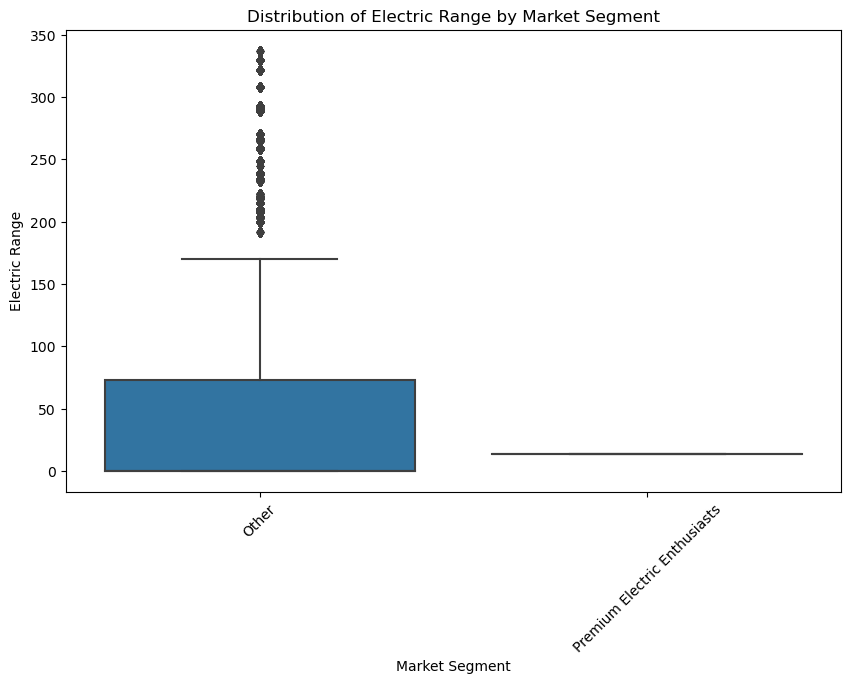

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Segment', y='Electric Range', order=df['Segment'].value_counts().index)
plt.title('Distribution of Electric Range by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

In [43]:
action_plan = {
    'Product Development': 'Enhance features that are valued by the target segment.',
    'Pricing Strategy': 'Set a competitive price point around the average target price.',
    'Distribution Channels': 'Expand presence in geographical areas where the target segment is concentrated.',
    'Promotional Campaigns': 'Launch targeted digital marketing campaigns focusing on the segment’s preferences and behaviors.'
}

print("Action Plan:")
for key, value in action_plan.items():
    print(f"- {key}: {value}")

Action Plan:
- Product Development: Enhance features that are valued by the target segment.
- Pricing Strategy: Set a competitive price point around the average target price.
- Distribution Channels: Expand presence in geographical areas where the target segment is concentrated.
- Promotional Campaigns: Launch targeted digital marketing campaigns focusing on the segment’s preferences and behaviors.


In [44]:
monitoring_metrics = ['Sales', 'Customer Acquisition Cost', 'Customer Satisfaction', 'Market Share']

print("Monitoring and Evaluation Plan:")
for metric in monitoring_metrics:
    print(f"- Track {metric} regularly to evaluate the effectiveness of the segmentation strategy.")

Monitoring and Evaluation Plan:
- Track Sales regularly to evaluate the effectiveness of the segmentation strategy.
- Track Customer Acquisition Cost regularly to evaluate the effectiveness of the segmentation strategy.
- Track Customer Satisfaction regularly to evaluate the effectiveness of the segmentation strategy.
- Track Market Share regularly to evaluate the effectiveness of the segmentation strategy.
